In [1]:
import pandas as pd
import numpy as np
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import folium
import missingno as msno

In [2]:
pd.set_option('display.max_rows', None)  # 최대 행 수 제한 해제
pd.set_option('display.max_columns', None)  # 최대 열 수 제한 해제
pd.set_option('display.width', None)  # 자동 너비 조정 해제
pd.set_option('display.max_colwidth', None)  # 최대 컬럼 너비 해제

# 흡연 단속 내역

In [3]:
yangcheongu = pd.read_csv('file/smoking_control_byDistrict_yangcheongu.csv')
jungnanggu = pd.read_csv('file/smoking_control_byDistrict_jungnanggu.csv')
dongjakgu = pd.read_csv('file/smoking_control_byDistrict_dongjakgu.csv')
gangnamgu = pd.read_csv('file/smoking_control_byDistrict_gangnamgu.csv')
gwanakgu = pd.read_csv('file/smoking_control_byDistrict_gwanakgu.csv')
songpagu = pd.read_csv('file/smoking_control_byDistrict_songpagu.csv')
mapogu = pd.read_csv('file/smoking_control_byDistrict_mapogu.csv')

## 양천구

In [4]:
yangcheongu.head()

,자치구명,연도,흡연민원건수,흡연단속건수,실내 금연구역 개수,실외 금연구역 개수
0,양천구,2015,241,1283,7945,404
1,양천구,2016,293,1336,7945,404
2,양천구,2017,303,979,7945,439
3,양천구,2018,326,744,7945,439
4,양천구,2019,291,988,7945,439


In [5]:
yangcheongu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   자치구명        10 non-null     object
 1   연도          10 non-null     int64 
 2   흡연민원건수      10 non-null     int64 
 3   흡연단속건수      10 non-null     int64 
 4   실내 금연구역 개수  10 non-null     int64 
 5   실외 금연구역 개수  10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 612.0+ bytes


In [6]:
yangcheongu[['흡연민원건수', '흡연단속건수', '실내 금연구역 개수', '실외 금연구역 개수']].mean()

흡연민원건수         314.0
흡연단속건수         766.9
실내 금연구역 개수    8386.5
실외 금연구역 개수     691.2
dtype: float64

In [7]:
yangcheongu[['흡연민원건수', '흡연단속건수', '실내 금연구역 개수', '실외 금연구역 개수']].describe()

,흡연민원건수,흡연단속건수,실내 금연구역 개수,실외 금연구역 개수
count,10.000000,10.000000,10.000000,10.000000
mean,314.000000,766.900000,8386.500000,691.200000
std,68.452741,359.309353,465.381862,281.121879
min,241.000000,331.000000,7945.000000,404.000000
25%,279.000000,491.250000,7945.000000,439.000000
50%,298.000000,656.000000,8386.500000,683.500000
75%,328.250000,985.750000,8828.000000,962.000000
max,485.000000,1336.000000,8828.000000,973.000000


In [8]:
yangcheongu[['흡연민원건수', '흡연단속건수', '실내 금연구역 개수', '실외 금연구역 개수']].corr()

,흡연민원건수,흡연단속건수,실내 금연구역 개수,실외 금연구역 개수
흡연민원건수,1.000000,-0.454469,0.357253,0.387806
흡연단속건수,-0.454469,1.000000,-0.877459,-0.898456
실내 금연구역 개수,0.357253,-0.877459,1.000000,0.998142
실외 금연구역 개수,0.387806,-0.898456,0.998142,1.000000


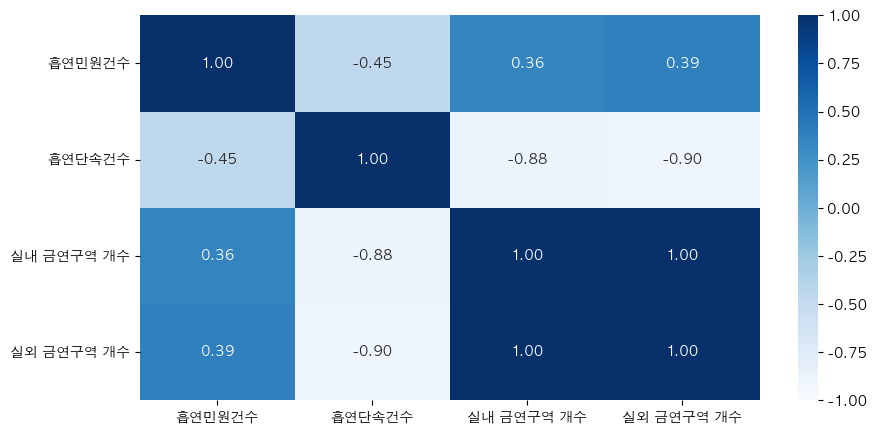

In [10]:
# 흡연민원건수, 흡연단속건수, 실내 금연구역 개수, 실외 금연구역 개수 별 상관관계
plt.figure(figsize=(10, 5))
sns.heatmap(yangcheongu[['흡연민원건수', '흡연단속건수', '실내 금연구역 개수', '실외 금연구역 개수']].corr(), 
            vmin=-1, vmax=1, annot=True, cmap='Blues', fmt='.2f')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

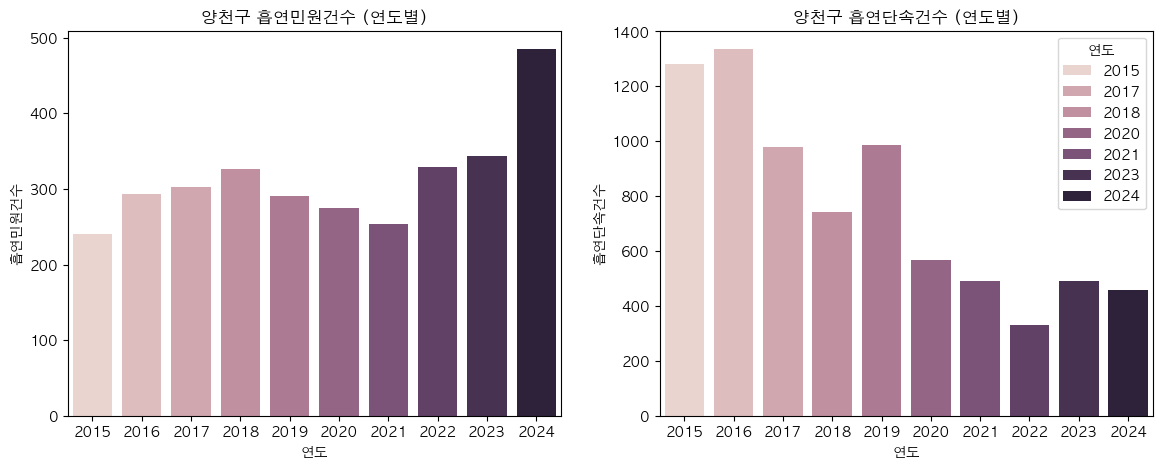

In [11]:
# 연도별 흡연민원건수, 흡연단속건수:line 실내금연구역개수 실외금연구역개수:bar
year_cpcd = yangcheongu.groupby('연도')[['흡연민원건수', '흡연단속건수']].sum()
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.2)
sns.barplot(data=year_cpcd, x='연도', y='흡연민원건수', ax=ax[0], hue='연도', legend=None)
sns.barplot(data=year_cpcd, x='연도', y='흡연단속건수', ax=ax[1], hue='연도')
ax[0].set_title('양천구 흡연민원건수 (연도별)')
ax[1].set_title('양천구 흡연단속건수 (연도별)')
rc('font', family='AppleGothic')
plt.show()

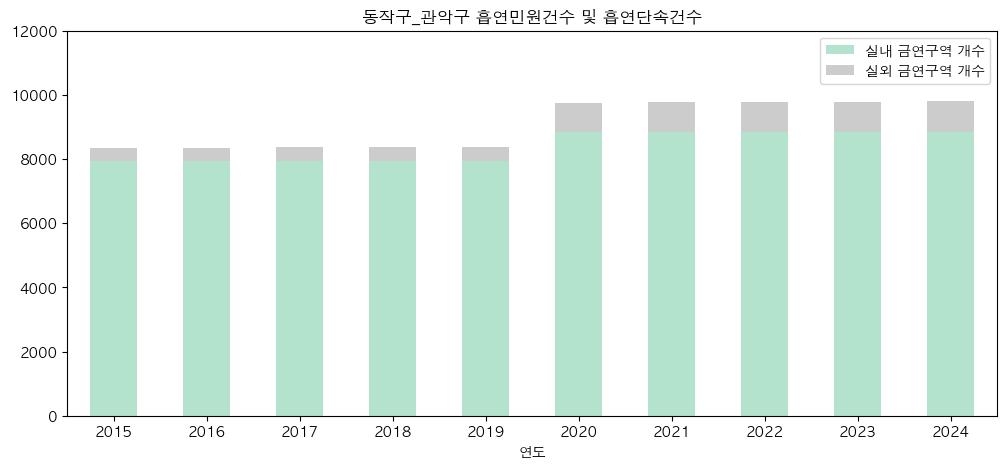

In [12]:
year_fac_count = yangcheongu.groupby(['연도'])[['실내 금연구역 개수', '실외 금연구역 개수']].sum().sort_values('연도')
year_fac_count

# 자치구별 흡연민원건수 및 흡연단속건수
yfc = year_fac_count.plot(kind='bar', rot=0, colormap='Pastel2', stacked=True, figsize=(12, 5))
yfc.set_title('동작구_관악구 흡연민원건수 및 흡연단속건수')
yfc.set_ylim([0, 12000])
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

## 마포구, 중랑구, 송파구

In [13]:
conc_mapo_jungnang_songpa = pd.concat([mapogu, jungnanggu, songpagu]).reset_index(drop=True)
conc_mapo_jungnang_songpa.tail()

,자치구명,연도,흡연민원건수,흡연단속건수
28,송파구,2017,1697,2487
29,송파구,2018,1852,2332
30,송파구,2019,2241,3572
31,송파구,2020,3508,2529
32,송파구,2021,2090,3236


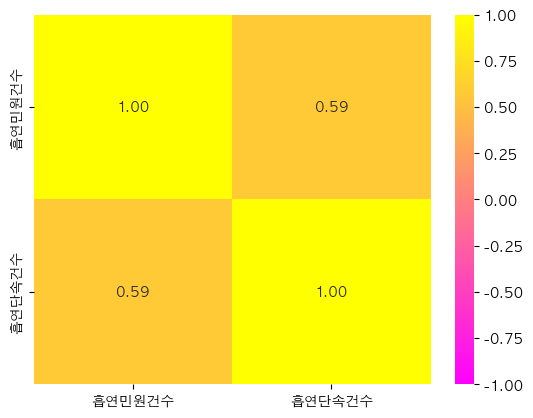

In [14]:
sns.heatmap(conc_mapo_jungnang_songpa[['흡연민원건수', '흡연단속건수']].corr(), vmin=-1, vmax=1, annot=True, cmap='spring', fmt='.2f')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

<Axes: xlabel='연도'>

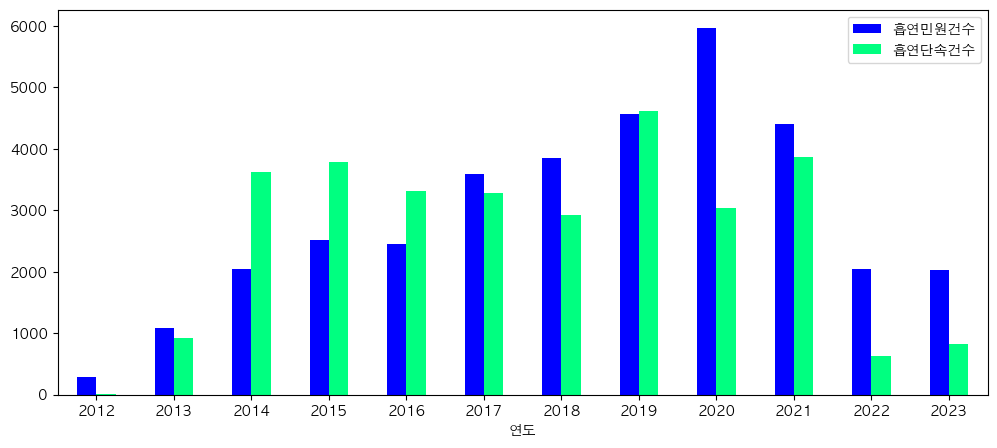

In [15]:
conc_mapo_jungnang_songpa.groupby(['연도'])[['흡연민원건수', '흡연단속건수']].sum().plot(kind='bar', figsize=(12, 5), rot=0, colormap='winter')

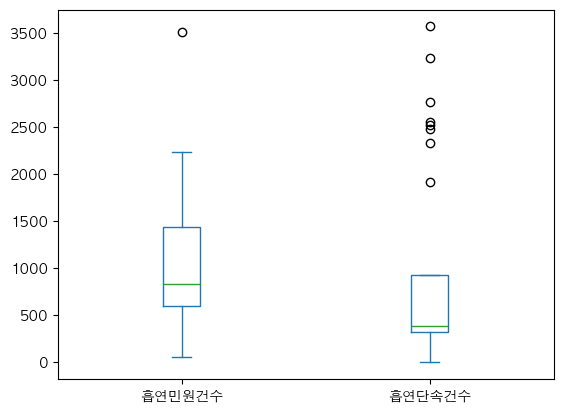

In [16]:
# 전체 흡연민원건수, 흡연단속건수에 대한 이상치 확인
conc_mapo_jungnang_songpa[['흡연민원건수', '흡연단속건수']].plot(kind='box')
plt.show()

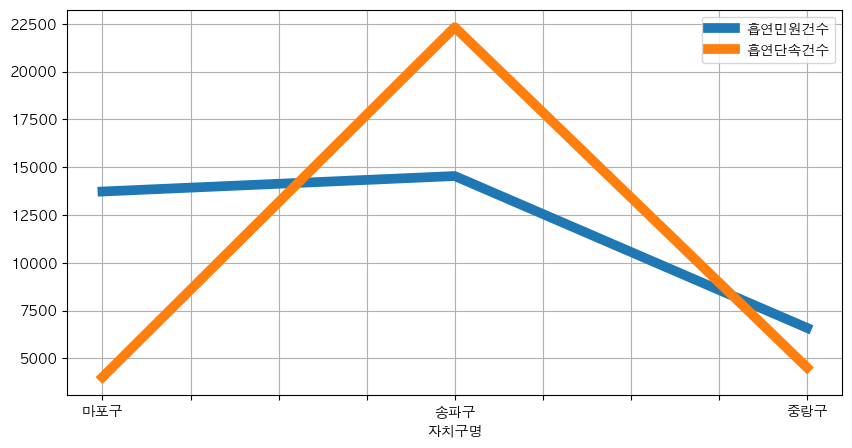

In [17]:
conc_mapo_jungnang_songpa.groupby('자치구명')[['흡연민원건수', '흡연단속건수']].sum().plot(kind='line', linewidth=7, figsize=(10, 5), grid=True)
plt.show()

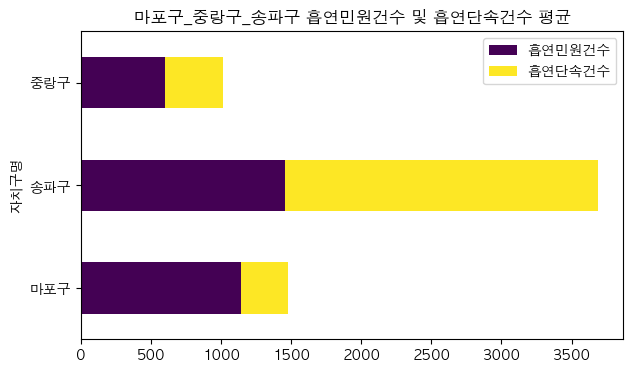

In [18]:
# 자치구별 흡연민원건수, 흡연단속건수 평균:bar
a = conc_mapo_jungnang_songpa.pivot_table(index=['자치구명'], values=['흡연민원건수'], aggfunc='mean')
b = conc_mapo_jungnang_songpa.pivot_table(index=['자치구명'], values=['흡연단속건수'], aggfunc='mean')
ab = pd.concat([a, b], axis=1)
ab.plot(kind='barh', figsize=(7, 4), rot=0, colormap='viridis', stacked=True)
plt.title('마포구_중랑구_송파구 흡연민원건수 및 흡연단속건수 평균')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

## 동작구, 관악구

In [19]:
dongjak_gwanak = pd.concat([dongjakgu, gwanakgu]).reset_index(drop=True)
dongjak_gwanak

,연도,19-29세,30-39세,40-49세,50-59세,60-69세,70세 이상,흡연민원건수,흡연단속건수,자치구명
0,2008,28,36,25,24,19,11,0,0,동작구
1,2009,26,34,34,24,13,11,0,0,동작구
2,2010,25,32,36,20,9,16,0,0,동작구
3,2011,27,32,28,17,18,12,0,0,동작구
4,2012,26,29,31,24,11,10,8,56,동작구
5,2013,20,31,32,21,12,7,32,149,동작구
6,2014,26,21,29,21,13,9,163,261,동작구
7,2015,23,22,21,19,12,7,152,97,동작구
8,2016,15,24,31,22,17,9,141,336,동작구
9,2017,22,28,35,21,13,7,217,1133,동작구


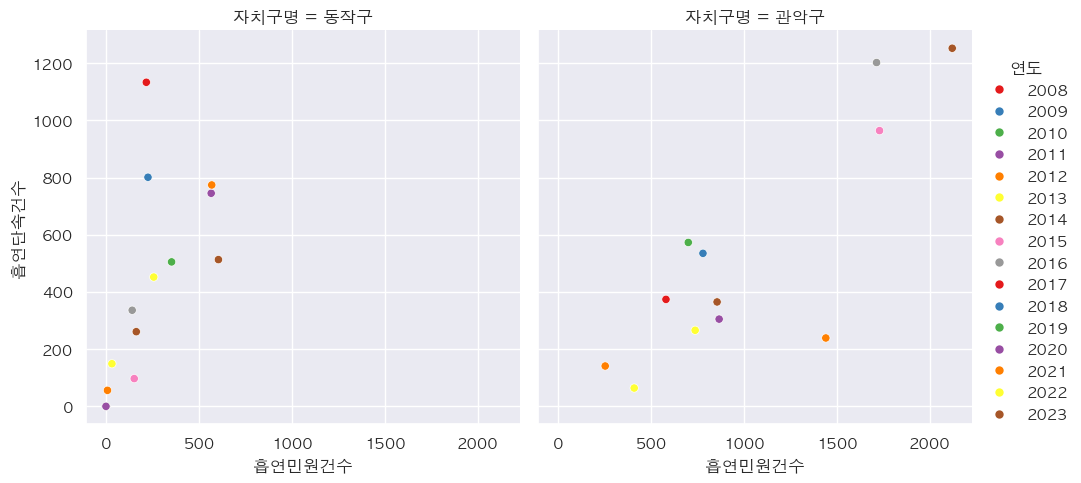

In [20]:
# 자치구별 흡연민원건수, 흡연단속건수를 연도별로 구분
sns.set(style='darkgrid', font="AppleGothic", rc={"axes.unicode_minus":False})
sns.relplot(data=dongjak_gwanak, x='흡연민원건수', y='흡연단속건수', hue='연도', palette='Set1', col='자치구명')
plt.show()

In [21]:
dongjak_gwanak['자치구명'].value_counts()

자치구명
동작구    16
관악구    12
Name: count, dtype: int64

In [22]:
whole_age = dongjak_gwanak.sort_values('연도', ascending=False).reset_index(drop=True).iloc[:, 1:7]
whole_age.head()

,19-29세,30-39세,40-49세,50-59세,60-69세,70세 이상
0,159,78,49,37,17,2
1,14,17,22,19,11,7
2,119,56,36,24,18,5
3,11,11,16,24,10,4
4,20,15,20,16,18,7


In [23]:
whole_age.corr()

,19-29세,30-39세,40-49세,50-59세,60-69세,70세 이상
19-29세,1.000000,0.982657,0.931061,0.505977,-0.055518,-0.169349
30-39세,0.982657,1.000000,0.956205,0.418836,-0.096208,-0.176700
40-49세,0.931061,0.956205,1.000000,0.558649,0.039132,-0.034091
50-59세,0.505977,0.418836,0.558649,1.000000,0.608092,0.311025
60-69세,-0.055518,-0.096208,0.039132,0.608092,1.000000,0.507105
70세 이상,-0.169349,-0.176700,-0.034091,0.311025,0.507105,1.000000


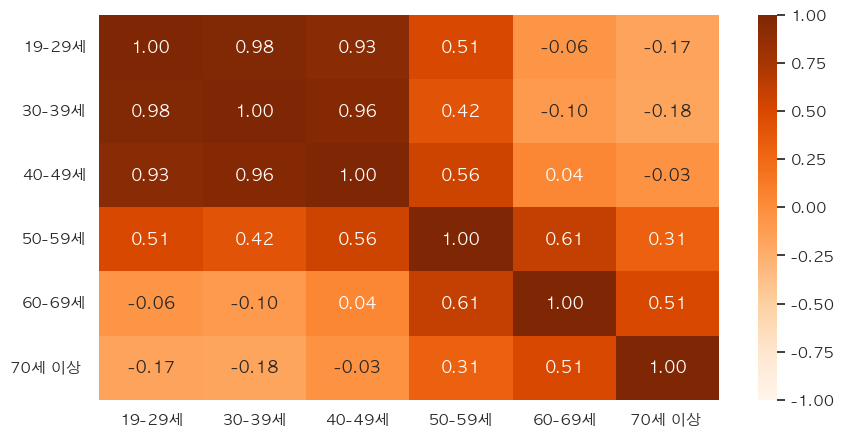

In [24]:
# 전연령별 흡연정보 상관관계
plt.figure(figsize=(10, 5))
sns.heatmap(whole_age.corr(), 
            vmin=-1, vmax=1, annot=True, cmap='Oranges', fmt='.2f')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [25]:
guname_age = dongjak_gwanak.groupby(['자치구명'])[['19-29세', '30-39세', '40-49세', 
                                                '50-59세', '60-69세', '70세 이상 ']].sum().sort_values('자치구명', ascending=False)
guname_age

,19-29세,30-39세,40-49세,50-59세,60-69세,70세 이상
자치구명,,,,,,
동작구,333,387,431,325,213,137
관악구,3314,1436,715,399,154,60


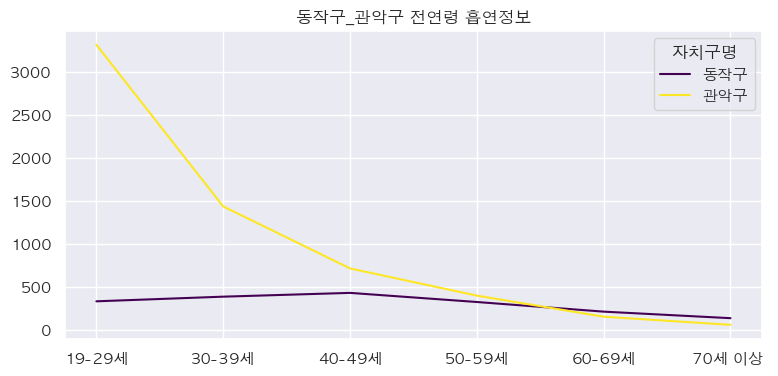

In [26]:
# 자치구별 전연령 흡연정보 
guname_age.T.plot(kind='line', figsize=(9, 4), rot=0, colormap='viridis')
plt.title('동작구_관악구 전연령 흡연정보')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [27]:
guname_count = dongjak_gwanak.groupby(['자치구명'])[['흡연민원건수', '흡연단속건수']].sum().sort_values('자치구명', ascending=False).T
guname_count

자치구명,동작구,관악구
흡연민원건수,3289,12205
흡연단속건수,5822,6280


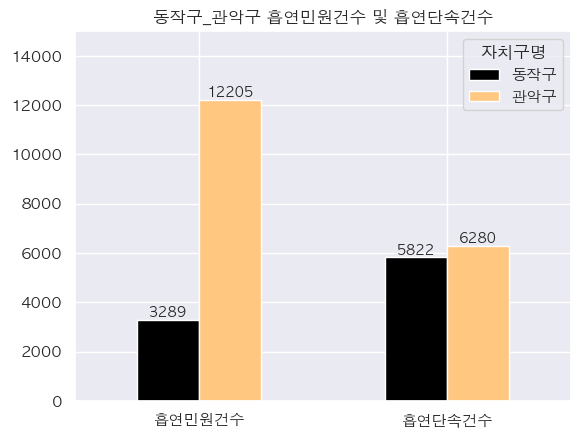

In [28]:
# 자치구별 흡연민원건수 및 흡연단속건수
gc = guname_count.plot(kind='bar', rot=0, colormap='copper')
gc.set_title('동작구_관악구 흡연민원건수 및 흡연단속건수')
gc.set_ylim([0, 15000])
for p in gc.patches:
    gc.text(
        p.get_x() + p.get_width() / 2,  # 막대의 중앙
        p.get_height() + 0.7,           # 막대 높이 위에 약간 띄운 위치
        f'{int(p.get_height())}',       # 표시할 값 (정수로 변환)
        ha='center',                    # 수평 정렬
        va='bottom',                    # 수직 정렬
        fontsize=10                     # 글꼴 크기
    )
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [29]:
year_count = dongjak_gwanak.groupby(['연도'])[['흡연민원건수', '흡연단속건수']].mean()[4:]
year_count

,흡연민원건수,흡연단속건수
연도,,
2012,131.5,98.5
2013,221.5,106.5
2014,1142.5,756.5
2015,941.5,530.5
2016,928.0,769.0
2017,399.5,753.5
2018,503.5,668.0
2019,527.5,539.0
2020,717.0,525.0


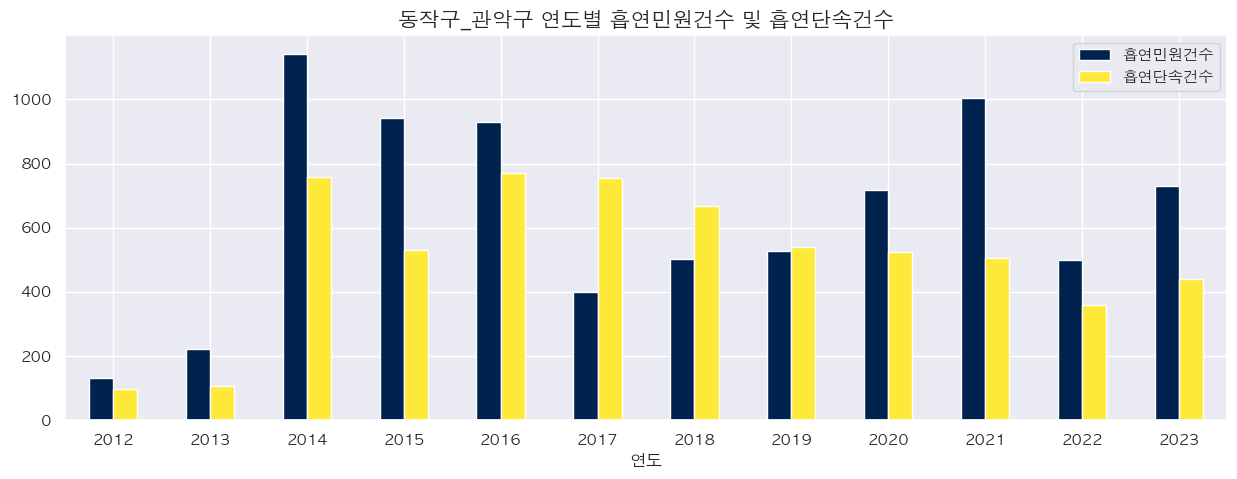

In [30]:
# 연도별 흡연민원건수 및 흡연단속건수
year_count.plot(kind='bar', rot=0, figsize=(15, 5), colormap='cividis')
plt.title('동작구_관악구 연도별 흡연민원건수 및 흡연단속건수', fontsize=15)
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [31]:
year_age = dongjak_gwanak.groupby('연도')[['19-29세', '30-39세', '40-49세', '50-59세', '60-69세', '70세 이상 ']].sum()
year_age = year_age.rename_axis(columns='전연령')
year_age

전연령,19-29세,30-39세,40-49세,50-59세,60-69세,70세 이상
연도,,,,,,
2008,28,36,25,24,19,11
2009,26,34,34,24,13,11
2010,25,32,36,20,9,16
2011,27,32,28,17,18,12
2012,84,63,63,36,15,10
2013,46,49,43,28,13,8
2014,732,379,172,41,18,10
2015,633,261,90,41,18,7
2016,704,287,148,89,37,25


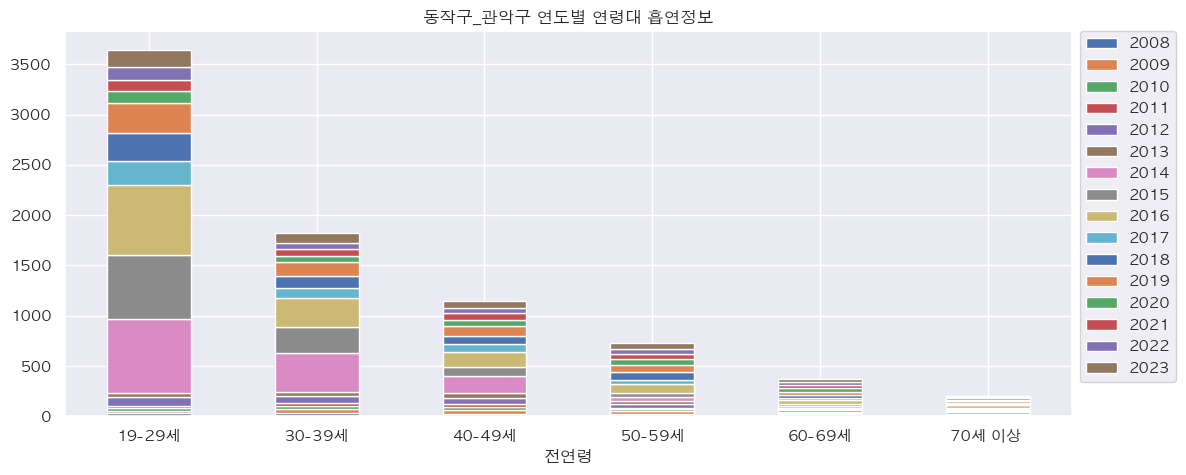

In [32]:
# 연도별 연령대 흡연정보
year_age.T.plot(kind='bar', rot=0, figsize=(13, 5), stacked=True)
plt.title('동작구_관악구 연도별 연령대 흡연정보')
plt.legend(loc=2, bbox_to_anchor=(1, 1.02), borderaxespad=0.5)
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

# 흡연 시설 현황

In [33]:
yeongdeungpogu = pd.read_csv('file/smoking_area_yeongdeungpogu.csv')
dongdaemungu = pd.read_csv('file/smoking_area_dongdaemungu.csv')
yangcheongu2 = pd.read_csv('file/smoking_area_yangcheongu2.csv')
seodaemungu = pd.read_csv('file/smoking_area_seodaemungu.csv')
eunpyeonggu = pd.read_csv('file/smoking_area_eunpyeonggu.csv')
gwangjingu = pd.read_csv('file/smoking_area_gwangjingu.csv')
seongbukgu = pd.read_csv('file/smoking_area_seongbukgu.csv')
yongsangu = pd.read_csv('file/smoking_area_yongsangu.csv')
gangbukgu = pd.read_csv('file/smoking_area_gangbukgu.csv')
gangseogu = pd.read_csv('file/smoking_area_gangseogu.csv')
gwanakgu2 = pd.read_csv('file/smoking_area_gwanakgu2.csv')
seochogu = pd.read_csv('file/smoking_area_seochogu.csv')

In [34]:
# yeongdeungpogu

## 은평구, 광진구, 용산구

In [35]:
eunpyeong_gwangjin_yongsan = pd.merge(left=eunpyeonggu, right=gwangjingu, how='outer').merge(right=yongsangu, how='outer')
eunpyeong_gwangjin_yongsan.tail()

,자치구명,시설 구분,주소,시설형태
568,은평구,호텔씨에스에비뉴,통일로 585-1,폐쇄형3
569,은평구,호텔씨에스에비뉴,통일로 585-1,폐쇄형4
570,은평구,호텔씨에스에비뉴,통일로 585-1,폐쇄형5
571,은평구,호텔씨에스에비뉴,통일로 585-1,폐쇄형6
572,은평구,희호프,"서오릉로 204 (갈현동, 지층)",폐쇄형


In [36]:
# eunpyeong_gwangjin_yongsan['시설형태'] = eunpyeong_gwangjin_yongsan['시설형태'].str.replace(' ', '', regex=True)
# eunpyeong_gwangjin_yongsan['시설형태'].str.replace(['1', '2', '3', '4', '5', '6', ''], '')
# eunpyeong_gwangjin_yongsan['시설형태'] = eunpyeong_gwangjin_yongsan['시설형태'].str.replace(r'[^폐쇄형개방형]', '', regex=True)
# eunpyeong_gwangjin_yongsan[eunpyeong_gwangjin_yongsan['시설형태'] == '폐쇄형']

eunpyeong_gwangjin_yongsan['시설형태'] = eunpyeong_gwangjin_yongsan['시설형태'].str.replace(r'\s+', '', regex=True)  # 공백 제거
eunpyeong_gwangjin_yongsan['시설형태'] = eunpyeong_gwangjin_yongsan['시설형태'].str.replace(r'\d+', '', regex=True)  # 숫자 제거
eunpyeong_gwangjin_yongsan['시설형태'] = eunpyeong_gwangjin_yongsan['시설형태'].str.replace('완전개방', '완전개방형', regex=True)
eunpyeong_gwangjin_yongsan['시설형태'] = eunpyeong_gwangjin_yongsan['시설형태'].str.replace('완전개방형형', '완전개방형', regex=True)
eunpyeong_gwangjin_yongsan.sample(5)

,자치구명,시설 구분,주소,시설형태
420,은평구,매니아 당구장,연서로27길 15,폐쇄형
557,은평구,하늘PC,통일로 855-20,폐쇄형
173,광진구,양지당구장,"서울특별시 광진구 군자로 145, 2층 (군자동)",완전폐쇄형
515,은평구,준당구장,응암로 180,폐쇄형
194,광진구,이큐당구클럽,"서울특별시 광진구 능동로 91, 지층 (자양동)",완전폐쇄형


In [37]:
eunpyeong_gwangjin_yongsan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구명    573 non-null    object
 1   시설 구분   573 non-null    object
 2   주소      573 non-null    object
 3   시설형태    573 non-null    object
dtypes: object(4)
memory usage: 18.0+ KB


In [38]:
print(eunpyeong_gwangjin_yongsan['자치구명'].value_counts())
print(eunpyeong_gwangjin_yongsan['자치구명'].unique())

자치구명
광진구    268
은평구    229
용산구     76
Name: count, dtype: int64
['광진구' '용산구' '은평구']


In [39]:
print(eunpyeong_gwangjin_yongsan['시설형태'].value_counts())
print(eunpyeong_gwangjin_yongsan['시설형태'].unique())

시설형태
폐쇄형      217
완전폐쇄형    185
개방형      147
완전개방형     24
Name: count, dtype: int64
['완전폐쇄형' '폐쇄형' '개방형' '완전개방형']


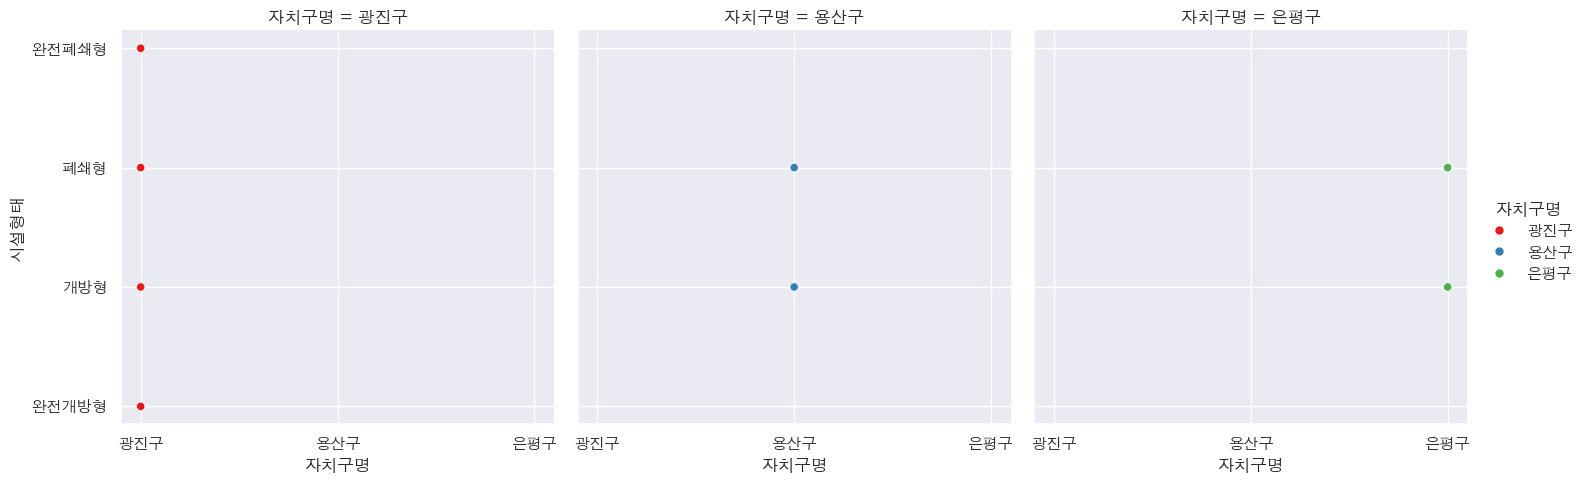

In [40]:
sns.relplot(data=eunpyeong_gwangjin_yongsan, x='자치구명', y='시설형태', hue='자치구명', col='자치구명', palette='Set1')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [41]:
gu = eunpyeong_gwangjin_yongsan.iloc[:, :1]
ft = eunpyeong_gwangjin_yongsan.iloc[:, -1:]
gu_ft = pd.concat([gu, ft], axis=1)
gu_ft.groupby('시설형태')['자치구명'].count()

시설형태
개방형      147
완전개방형     24
완전폐쇄형    185
폐쇄형      217
Name: 자치구명, dtype: int64

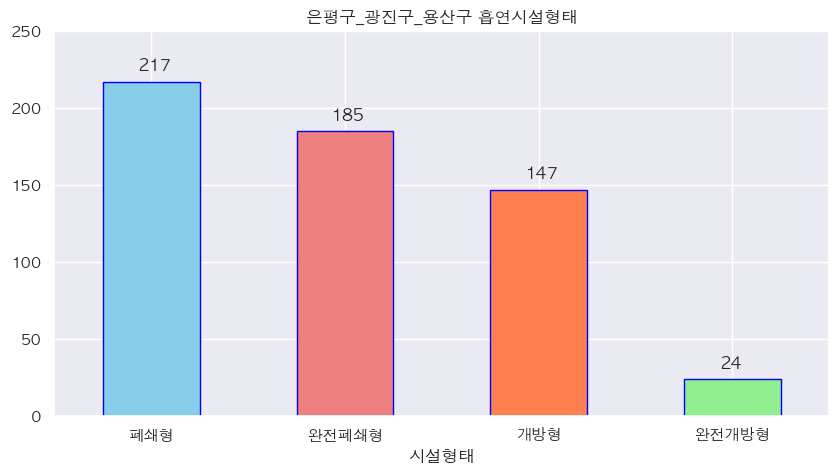

In [42]:
gu_ft.groupby('시설형태')['자치구명'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), rot=0, edgecolor='blue',
                                                                            color=['skyblue', 'lightcoral', 'coral', 'lightgreen'])
plt.title('은평구_광진구_용산구 흡연시설형태')
plt.ylim([0, 250])
for i, val in enumerate(gu_ft['시설형태'].value_counts()):
    plt.text(i-0.07, val+7, val.real)
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [43]:
le = LabelEncoder()
eunpyeong_gwangjin_yongsan['facility_type'] = le.fit_transform(eunpyeong_gwangjin_yongsan['시설형태'])
eunpyeong_gwangjin_yongsan['local_name'] = le.fit_transform(eunpyeong_gwangjin_yongsan['자치구명'])
eunpyeong_gwangjin_yongsan.head()

,자치구명,시설 구분,주소,시설형태,facility_type,local_name
0,광진구,1%PC아레나,"서울특별시 광진구 천호대로129길 29, 2층 (중곡동)",완전폐쇄형,2,0
1,광진구,5번 출구 피씨방,"서울특별시 광진구 아차산로 244, 지하1층 (자양동)",완전폐쇄형,2,0
2,광진구,Carom Cafe,"서울특별시 광진구 아차산로 444, 지층 103호 (구의동, 와이엔 오피스텔)",완전폐쇄형,2,0
3,광진구,G PRO PC&CAFE,"서울특별시 광진구 광나루로 382, 지하1,2층 (화양동, 아스하임)",완전폐쇄형,2,0
4,광진구,NK 골프클럽,서울특별시 광진구 용마산로 21 (중곡동),완전폐쇄형,2,0


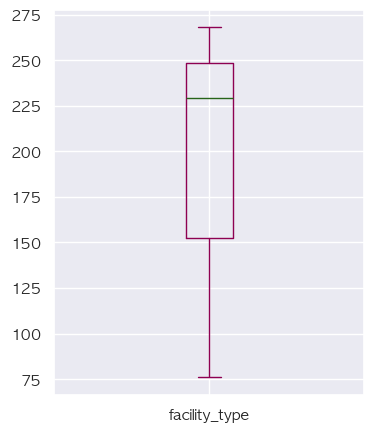

In [44]:
# 자치구별 시설형태 종류의 이상치 확인
eunpyeong_gwangjin_yongsan.groupby('자치구명')['facility_type'].count().plot(kind='box', figsize=(4, 5), cmap='PiYG')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [45]:
eunpyeong_gwangjin_yongsan[['facility_type', 'local_name']].describe()

,facility_type,local_name
count,573.000000,573.000000
mean,1.823735,0.931937
std,1.190872,0.929645
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,3.000000,2.000000


In [46]:
eunpyeong_gwangjin_yongsan[['facility_type', 'local_name']].corr()

,facility_type,local_name
facility_type,1.000000,0.456571
local_name,0.456571,1.000000


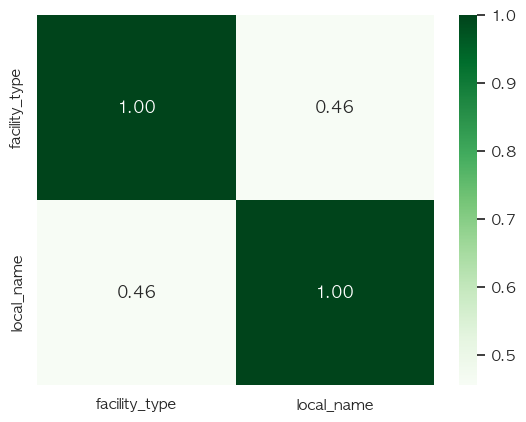

In [47]:
sns.heatmap(eunpyeong_gwangjin_yongsan[['facility_type', 'local_name']].corr(), cmap='Greens', annot=True, fmt='.2f')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

## 동대문구, 양천구, 서대문구, 성북구, 강북구, 강서구, 관악구

In [48]:
dong_yang_seo_seong_buk_seo_gwan = pd.concat([dongdaemungu, yangcheongu2, seodaemungu, seongbukgu, gangbukgu, gangseogu, gwanakgu2]).reset_index(drop=True)
dong_yang_seo_seong_buk_seo_gwan.head()

,자치구명,시설 구분,주소,시설형태,규모(제곱미터)
0,동대문구,건물관리자,천호대로 395 2(장안동) 옥상,개방형,12.0
1,동대문구,건물관리자,망우로 60(휘경동) 옥상,개방형,13.0
2,동대문구,건물관리자,이문로 136(이문동) 1층,개방형,9.0
3,동대문구,건물관리자,장한로 47(장안동) 1층,개방형,3.0
4,동대문구,건물관리자,답십리로64길 103(장안동) 1층,개방형,3.0


In [49]:
dong_yang_seo_seong_buk_seo_gwan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구명      280 non-null    object 
 1   시설 구분     280 non-null    object 
 2   주소        280 non-null    object 
 3   시설형태      280 non-null    object 
 4   규모(제곱미터)  280 non-null    float64
dtypes: float64(1), object(4)
memory usage: 11.1+ KB


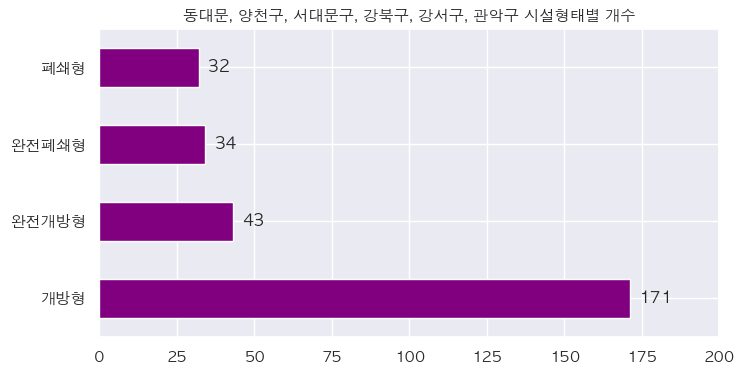

In [50]:
dong_yang_seo_seong_buk_seo_gwan['시설형태'].value_counts().plot(kind='barh', figsize=(8, 4), rot=0, color='purple')
for i, val in enumerate(dong_yang_seo_seong_buk_seo_gwan['시설형태'].value_counts()):
    plt.text(val+3, i-0.05, val.real)
plt.xlim([0, 200])
plt.ylabel(None)
plt.title('동대문, 양천구, 서대문구, 강북구, 강서구, 관악구 시설형태별 개수', fontdict={'size':11})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

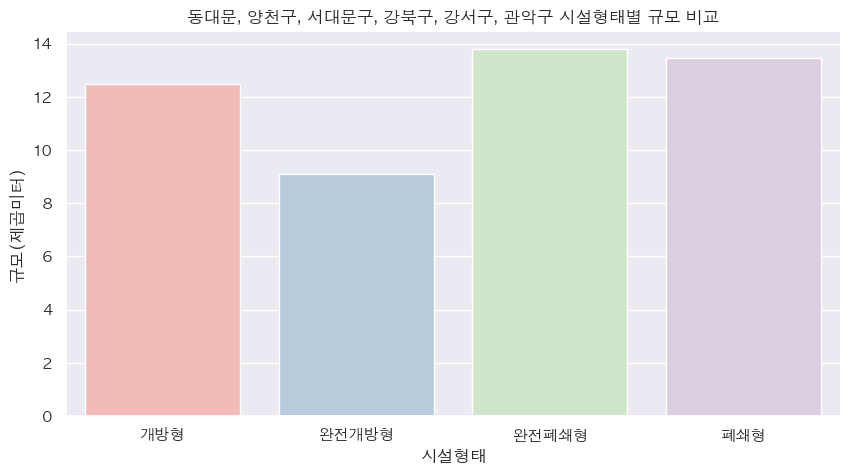

In [51]:
# a = dong_yang_seo_seong_buk_seo_gwan.groupby('시설형태')[['규모(제곱미터)']].mean().plot(kind='bar', rot=0)
plt.figure(figsize=(10, 5))
sns.barplot(dong_yang_seo_seong_buk_seo_gwan.groupby('시설형태')[['규모(제곱미터)']].mean(),
            x='시설형태', y='규모(제곱미터)', hue='시설형태', palette='Pastel1')
plt.title('동대문, 양천구, 서대문구, 강북구, 강서구, 관악구 시설형태별 규모 비교')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

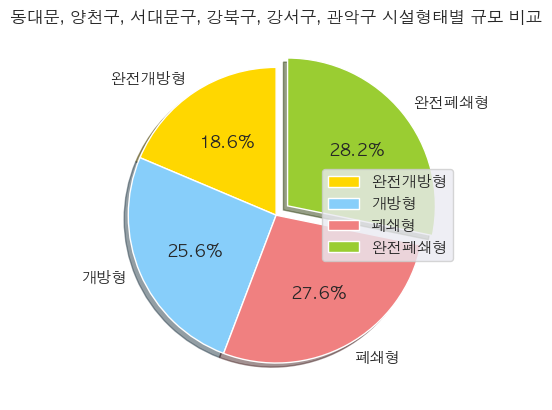

In [52]:
explode = (0, 0, 0, 0.1)
labels = ['완전개방형', '개방형', '폐쇄형', '완전폐쇄형']
colors = ['gold', 'lightskyblue', 'lightcoral', 'yellowgreen']
plt.pie(dong_yang_seo_seong_buk_seo_gwan.groupby('시설형태')['규모(제곱미터)'].mean().sort_values(ascending=True),
        explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, labels=labels, colors=colors)
plt.title('동대문, 양천구, 서대문구, 강북구, 강서구, 관악구 시설형태별 규모 비교')
plt.legend(loc='center right')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [53]:
dong_yang_seo_seong_buk_seo_gwan.describe()

,규모(제곱미터)
count,280.000000
mean,12.239107
std,12.675190
min,0.000000
25%,5.375000
50%,9.000000
75%,15.000000
max,100.000000


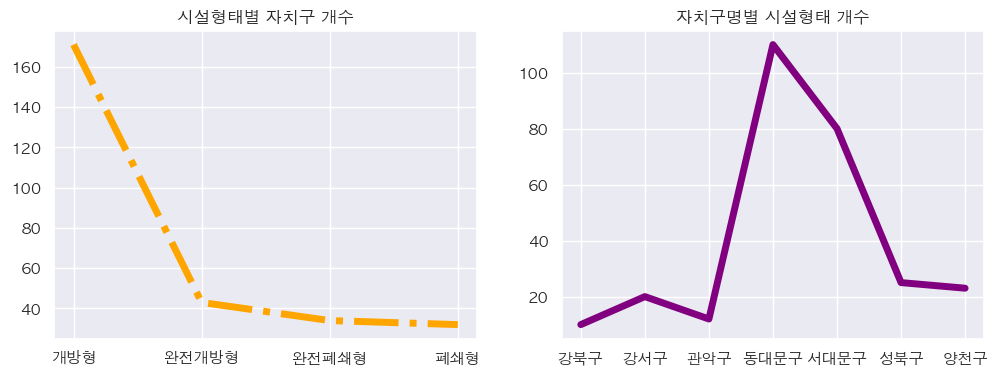

In [54]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].plot(dong_yang_seo_seong_buk_seo_gwan.groupby('시설형태')[['자치구명']].count(), color='orange', linewidth=5, linestyle='-.')
ax[0].set_title('시설형태별 자치구 개수')
ax[1].plot(dong_yang_seo_seong_buk_seo_gwan.groupby('자치구명')[['시설형태']].count(), color='purple', linewidth=5, linestyle='-')
ax[1].set_title('자치구명별 시설형태 개수')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

## 서초구

In [55]:
# seochogu

In [56]:
# seochogu['시설형태'].unique()

# 금연구역 정보

In [57]:
seoul_nonsmoking_area = pd.read_csv('file/seoul_nonsmoking_area.csv')
seoul_nonsmoking_area.sample(10)

,시군구명,금연구역명,금연구역범위상세,금연구역구분,금연구역지정근거명,소재지도로명주소,소재지지번주소,관리기관명,위도,경도
9456,마포구,포멜로빈,시설전체,음식점,국민건강증진법제9조,"서울특별시 마포구 백범로 170, 102동 9-1호 (공덕동, 공덕더샵아파트)",-,서울특별시 마포구청,37.544296,126.949263
3128,마포구,동교동 스타피카소,시설전체,"사무용건축물,공장 및 복합건축물",국민건강증진법제9조,서울특별시 마포구 양화로 176 (동교동),-,서울특별시 마포구청,37.557247,126.924986
2311,마포구,석전빌딩,시설전체,"사무용건축물,공장 및 복합건축물",국민건강증진법제9조,서울특별시 마포구 와우산로21길 29 (서교동),-,서울특별시 마포구청,37.552187,126.922367
4720,마포구,캐롤킹,시설전체,음식점,국민건강증진법제9조,"서울특별시 마포구 홍익로6길 18, B1동 (동교동)",-,서울특별시 마포구청,37.555256,126.922979
8755,마포구,놀부부대합정자이점,시설전체,음식점,국민건강증진법제9조,"서울특별시 마포구 양화로 45 (서교동, 메세나폴리스B1107호)",-,서울특별시 마포구청,37.551501,126.913950
3913,중랑구,드림어린이집,경계로부터 10m 이내,어린이집,서울특별시 중랑구 간접흡연 피해방지 조례 5조 1항 6호,서울특별시 중랑구 겸재로64길 23,-,서울특별시 중랑구청,37.589225,127.096013
4540,마포구,한국여성의집,시설전체,사회복지시설,국민건강증진법제9조,서울특별시 마포구 성미산로19길 63(연남동),-,서울특별시 마포구청,37.564565,126.917612
748,강서구,명지어린이집,어린이집 경계로부터 10m 이내 지역,어린이집,서울특별시 강서구 간접흡연 피해 방지 조례 제5조,"서울특별시 강서구 등촌로13아길 44 101동 106호(화곡동, 명지해드는터 아파트)",-,서울특별시 강서구보건소,37.536900,126.856350
3977,마포구,현대홈타운(임대),시설전체,사회복지시설(경로당),국민건강증진법제9조,"서울특별시 마포구 새창로8길 72(도화동, 현대홈타운)",-,서울특별시 마포구청,37.538646,126.951342
2197,마포구,주하빌딩,시설전체,"사무용건축물,공장 및 복합건축물",국민건강증진법제9조,서울특별시 마포구 백범로 68-1 (신수동),-,서울특별시 마포구청,37.548822,126.939330


In [58]:
seoul_nonsmoking_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9959 entries, 0 to 9958
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시군구명       9959 non-null   object 
 1   금연구역명      9959 non-null   object 
 2   금연구역범위상세   9959 non-null   object 
 3   금연구역구분     9959 non-null   object 
 4   금연구역지정근거명  9959 non-null   object 
 5   소재지도로명주소   9959 non-null   object 
 6   소재지지번주소    9959 non-null   object 
 7   관리기관명      9959 non-null   object 
 8   위도         9959 non-null   float64
 9   경도         9959 non-null   float64
dtypes: float64(2), object(8)
memory usage: 778.2+ KB


In [59]:
seoul_nonsmoking_area = seoul_nonsmoking_area.sort_values(by='시군구명').reset_index(drop=True)
seoul_nonsmoking_area.head()

,시군구명,금연구역명,금연구역범위상세,금연구역구분,금연구역지정근거명,소재지도로명주소,소재지지번주소,관리기관명,위도,경도
0,강동구,까치,공원전체,공원,국민건강증진법제9조,서울특별시 강동구 상일동 177,서울특별시 강동구 상일동 177,서울특별시 강동구청,37.547781,127.162155
1,강동구,꿈나래,공원전체,공원,국민건강증진법제9조,서울특별시 강동구 아리수로64길29,서울특별시 강동구 고덕1동 536,서울특별시 강동구청,37.560865,127.153795
2,강동구,꿈터,공원전체,공원,국민건강증진법제9조,서울특별시 강동구 강일동 429-1,서울특별시 강동구 강일동 429-1,서울특별시 강동구청,37.560859,127.180301
3,강동구,나루,공원전체,공원,국민건강증진법제9조,서울특별시 강동구 천호2동 569-1,서울특별시 강동구 천호2동 569-1,서울특별시 강동구청,37.547016,127.123608
4,강동구,능골,공원전체,공원,국민건강증진법제9조,서울특별시 강동구 강일동 산19,서울특별시 강동구 강일동 산19,서울특별시 강동구청,37.556876,127.174715


In [60]:
seoul_nonsmoking_area['시군구명'].unique()

array(['강동구', '강서구', '마포구', '서대문구', '서초구', '용산구', '은평구', '종로구', '중랑구'],
      dtype=object)

/var/folders/4x/sc1vlfq546sgvmk9_m2t10_80000gn/T/ipykernel_17040/52255925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seoul_nonsmoking_area['시군구명'].value_counts(), palette='hot')


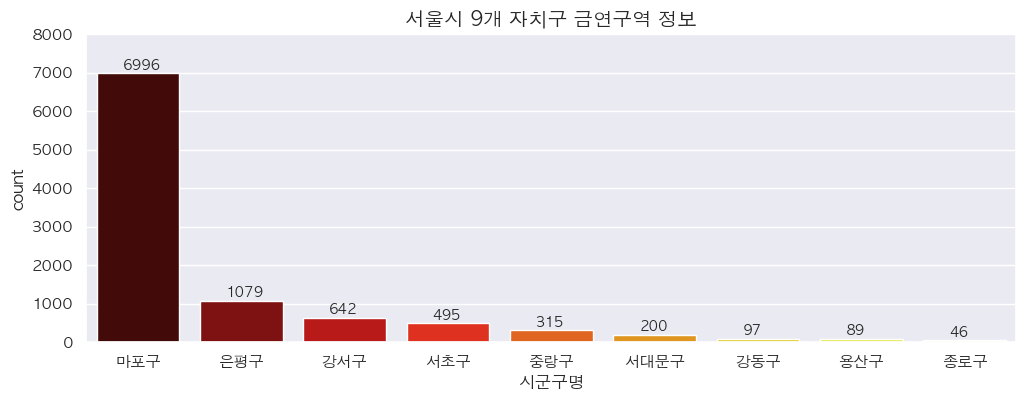

In [61]:
plt.figure(figsize=(12, 4))
sns.barplot(data=seoul_nonsmoking_area['시군구명'].value_counts(), palette='hot')
plt.ylim([0, 8000])
plt.title('서울시 9개 자치구 금연구역 정보', fontdict={'size':14})
for i, val in enumerate(seoul_nonsmoking_area['시군구명'].value_counts()):
    plt.text(i-0.15, val+90, val.real, fontdict={'size':10})
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [62]:
seoul_nonsmoking_area['금연구역구분'] = seoul_nonsmoking_area['금연구역구분'].str.replace(r'\s+', '', regex=True)  # 공백 제거

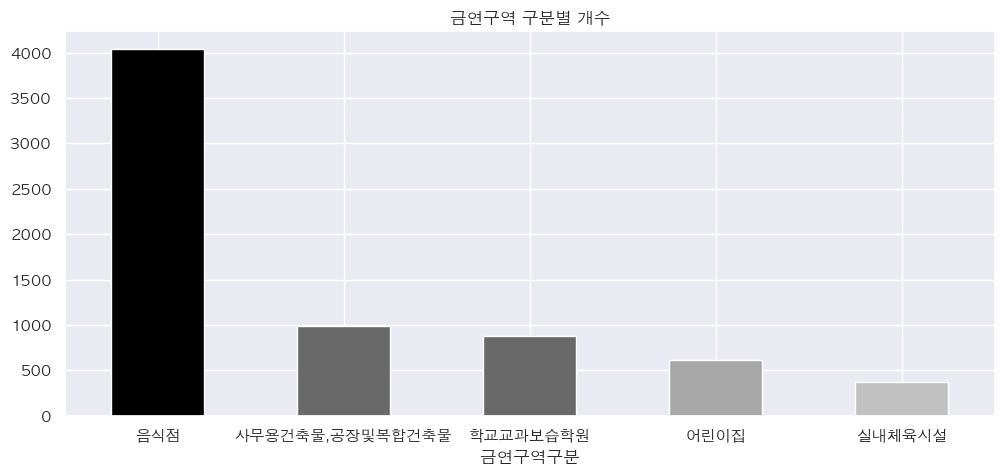

In [63]:
colors = ['black','dimgray','dimgrey','darkgray','silver','lightgrey']
seoul_nonsmoking_area['금연구역구분'].sort_values(ascending=True).value_counts().head().plot(kind='bar', rot=0, figsize=(12, 5), color=colors)
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.title('금연구역 구분별 개수')
plt.show()

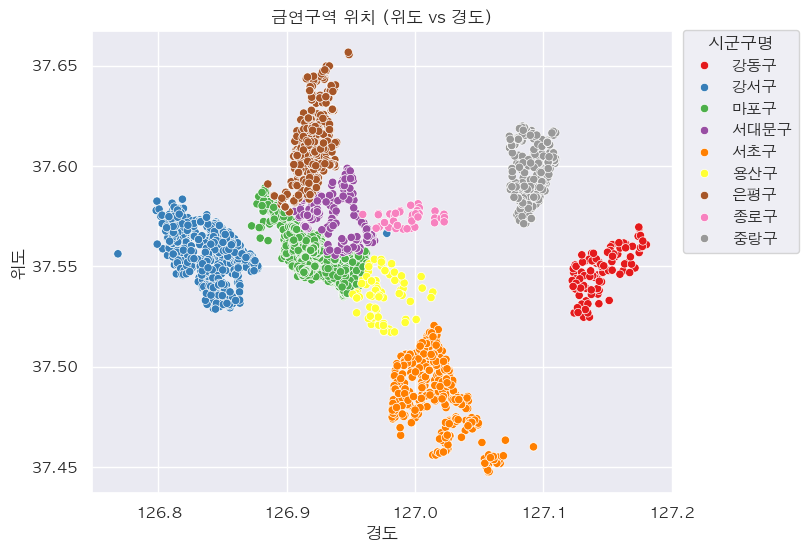

In [64]:
plt.figure(figsize=(7.5, 6))
loc = sns.scatterplot(data=seoul_nonsmoking_area, x='경도', y='위도', hue='시군구명', palette='Set1')
sns.move_legend(loc, loc='upper right', bbox_to_anchor=(1.23, 1.02))
plt.title('금연구역 위치 (위도 vs 경도)')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [65]:
seoul_nonsmoking_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9959 entries, 0 to 9958
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시군구명       9959 non-null   object 
 1   금연구역명      9959 non-null   object 
 2   금연구역범위상세   9959 non-null   object 
 3   금연구역구분     9959 non-null   object 
 4   금연구역지정근거명  9959 non-null   object 
 5   소재지도로명주소   9959 non-null   object 
 6   소재지지번주소    9959 non-null   object 
 7   관리기관명      9959 non-null   object 
 8   위도         9959 non-null   float64
 9   경도         9959 non-null   float64
dtypes: float64(2), object(8)
memory usage: 778.2+ KB


In [66]:
le = LabelEncoder()
seoul_nonsmoking_area['district'] = le.fit_transform(seoul_nonsmoking_area['시군구명'])
seoul_nonsmoking_area['management'] = le.fit_transform(seoul_nonsmoking_area['관리기관명'])
seoul_nonsmoking_area.sample(5)

,시군구명,금연구역명,금연구역범위상세,금연구역구분,금연구역지정근거명,소재지도로명주소,소재지지번주소,관리기관명,위도,경도,district,management
7286,마포구,WS복싱클럽(성산점),시설전체,실내체육시설,국민건강증진법제9조,"서울특별시 마포구 월드컵북로 211, 지하1층 (성산동, 동덕빌딩)",-,서울특별시 마포구청,37.568959,126.905305,2,2
1801,마포구,돈치킨호프 구운치킨,시설전체,음식점,국민건강증진법제9조,서울특별시 마포구 공덕동 371 공덕삼성아파트상가 지하1층 117~127호,-,서울특별시 마포구청,37.553265,126.915763,2,2
3691,마포구,더크래프트(TheCraft),시설전체,음식점,국민건강증진법제9조,서울특별시 마포구 신촌로 256-1 (아현동),-,서울특별시 마포구청,37.557094,126.954155,2,2
2103,마포구,서교가든숯불갈비,시설전체,음식점,국민건강증진법제9조,"서울특별시 마포구 잔다리로 83 (서교동, 1층)",-,서울특별시 마포구청,37.554685,126.915772,2,2
7573,마포구,삼기빌딩,시설전체,"사무용건축물,공장및복합건축물",국민건강증진법제9조,서울특별시 마포구 월드컵북로6길 26 (동교동),-,서울특별시 마포구청,37.558275,126.920119,2,2


In [67]:
seoul_nonsmoking_area[['위도', '경도', 'district', 'management']].corr()

,위도,경도,district,management
위도,1.000000,-0.192701,0.469645,0.363810
경도,-0.192701,1.000000,0.462381,0.492298
district,0.469645,0.462381,1.000000,0.968929
management,0.363810,0.492298,0.968929,1.000000


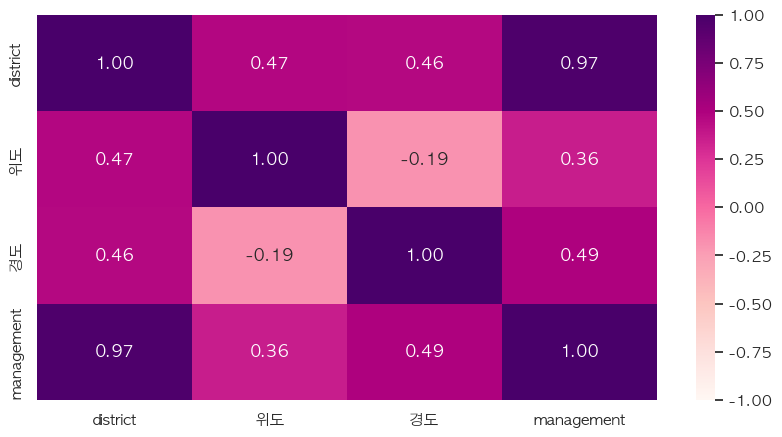

In [68]:
# 금연구역의 자치구와 관리기관의 상관관계
plt.figure(figsize=(10, 5))
sns.heatmap(seoul_nonsmoking_area[['district', '위도', '경도', 'management']].corr(), 
            vmin=-1, vmax=1, annot=True, cmap='RdPu', fmt='.2f')
rc('font', family='AppleGothic')
rcParams['axes.unicode_minus'] = False
plt.show()

In [69]:
sample = seoul_nonsmoking_area.sample(100)

lat_mean = sample['위도'].mean()
long_mean = sample['경도'].mean()
m = folium.Map(location=[lat_mean, long_mean], zoom_start=12, width='100%', height='100%')

for i in sample.index:
    tooltip = '<h5>' + sample.loc[i, '금연구역구분'] + '<h5>'
    lat     = sample.loc[i, '위도']
    long    = sample.loc[i, '경도']
    folium.Circle(
        radius=200,
        location = [lat, long],
        tooltip  = tooltip,
        color    = 'red',
        fill     = True,
        opacity  = 50
    ).add_to(m)

m